## Data Visualisation

In this notebook I will visualise the data to find any interesting trends. I also want to decide our forecasting step ie, forecast for every hour, day , week etc. so let's explore!

In [70]:
#loading libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#loading data
df = pd.read_csv('air_pollution.csv')

In [72]:
df.head()

,date,CO,NO_2,O_3,SO_2,PM10,PM25
0,2001-01-01 01:00:00,1.2568,55.287601,7.8292,22.1004,30.660417,NaN
1,2001-01-01 02:00:00,2.2696,55.848400,7.0744,24.0064,41.035909,NaN
2,2001-01-01 03:00:00,2.3544,55.720800,6.8332,25.4832,56.345218,NaN
3,2001-01-01 04:00:00,2.0456,56.596800,7.1856,23.6180,47.972083,NaN
4,2001-01-01 05:00:00,1.4376,53.827600,7.9592,20.0304,36.637083,NaN


In [73]:
#converting to date time format
df['date'] = pd.to_datetime(df['date'])

### Histograms

In [74]:
#function to create histograms
def histograms(df):
    
    #dropping nans from PM25 for histogram
    df = df.dropna()
        
    #initializing the axes for subplots
    f, axes = plt.subplots(3, 2, figsize=(20, 10))
        
    #iterating through each axes and column name
    for ax, column in zip(axes.flat, df.columns[1:]):
        
        #creating histograms for each pollutant axis
        sns.distplot(df[column],ax=ax)
        
    f.text(0.5,0.9, 'Distribution of each pollutant', ha="center", va="center",size=20)
        
    
    plt.show()

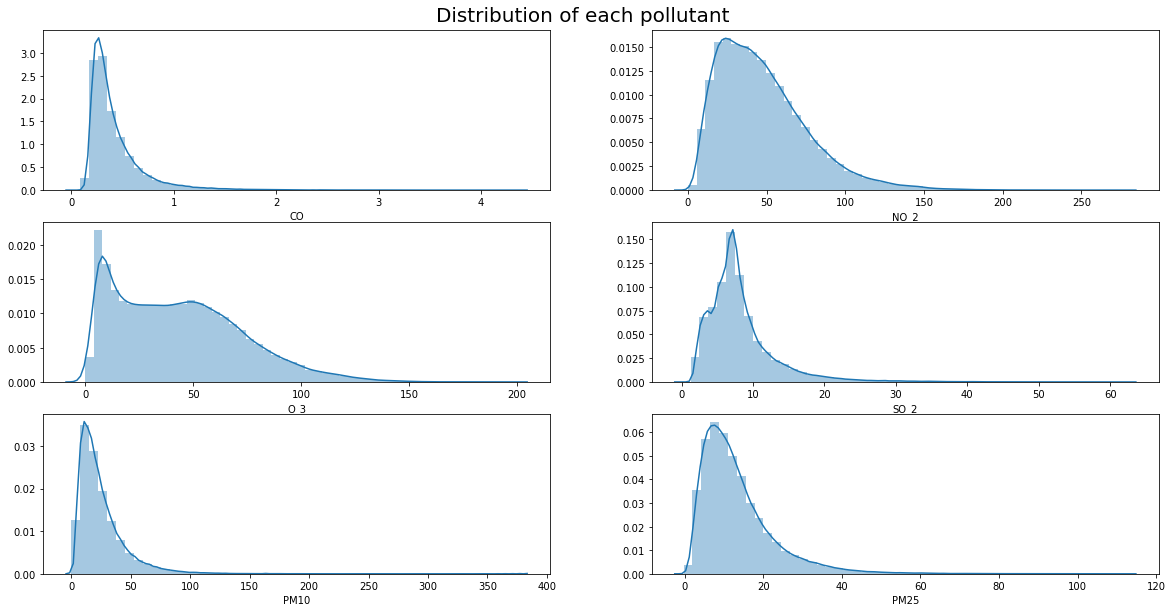

In [75]:
histograms(df)

All the histograms shows that the distribution of pollutant levels are binomial but right skewed. SO2 seems to be a little bit bell shaped. But since all distributions look normally distributed this is good for forecasting.

### Pairplots

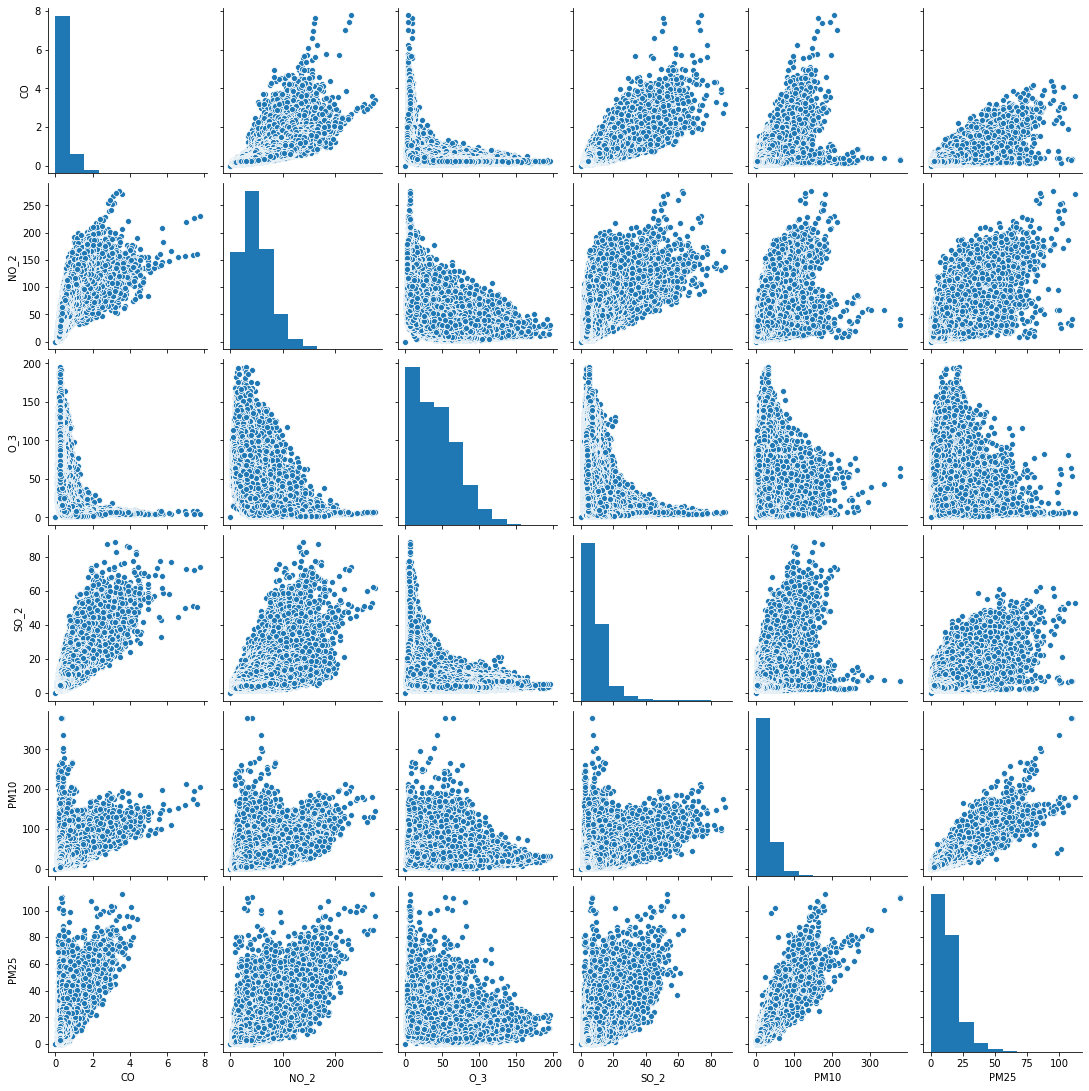

In [76]:
sns.pairplot(df)

It seems PM10 and PM2.5 to be very possitively correlated. All other pollutants show a little positive correlation except O2 which shows a negative correlation points. We can validate our hypothesis by looking pearson correlation.

In [77]:
df.corr()

,CO,NO_2,O_3,SO_2,PM10,PM25
CO,1.000000,0.744922,-0.506047,0.800260,0.575804,0.694596
NO_2,0.744922,1.000000,-0.620078,0.634180,0.616686,0.697500
O_3,-0.506047,-0.620078,1.000000,-0.433057,-0.250086,-0.360999
SO_2,0.800260,0.634180,-0.433057,1.000000,0.483074,0.539881
PM10,0.575804,0.616686,-0.250086,0.483074,1.000000,0.902038
PM25,0.694596,0.697500,-0.360999,0.539881,0.902038,1.000000


Since some of the pollutants show high correlation we can use them to as features for forecasting in our models.

### Time Series Line Plots

In [78]:
#function to create line plots
def create_plots(df,time_grouper):
    
    
    #depending the time grouper passed, the function groups the dataframe
    if time_grouper == 'year':
        newdf = df.groupby(df['date'].dt.year).mean()
    elif time_grouper == 'month':
        newdf = df.groupby(df['date'].dt.month).mean()
    elif time_grouper == 'day of week':
        newdf = df.groupby(df['date'].dt.dayofweek).mean()
    elif time_grouper == 'hour':
        newdf = df.groupby(df['date'].dt.hour).mean()
    elif time_grouper =='week of year':
        newdf = df.groupby(df['date'].dt.weekofyear).mean()
    elif time_grouper =='no grouper':
        newdf = df.groupby(df['date']).mean()
    else:
        print('Please specify one of year, month, day or hour to group by!')
        
    #creating subplots for each pollutant time series based on the grouper
    ax = newdf.plot(subplots=True,layout=(3,2),figsize =(20,10))
    fig=ax[0,0].figure
    fig.text(0.5,0.1, time_grouper, ha="center", va="center",size=16)
    fig.text(0.1,0.5, 'μg/m3', ha="center", va="center", rotation=90,size=16)
    plt.show()

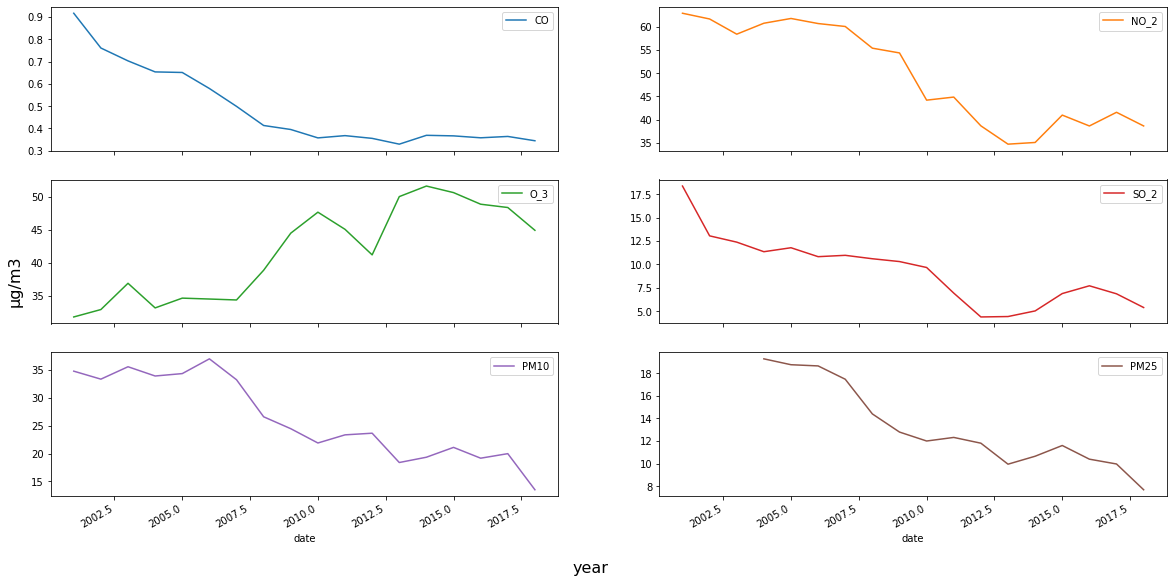

In [79]:
create_plots(df,'year')

O2 is the only pollutant that seems to have increased over time. Is it because of gloabl warming? Will have to research.

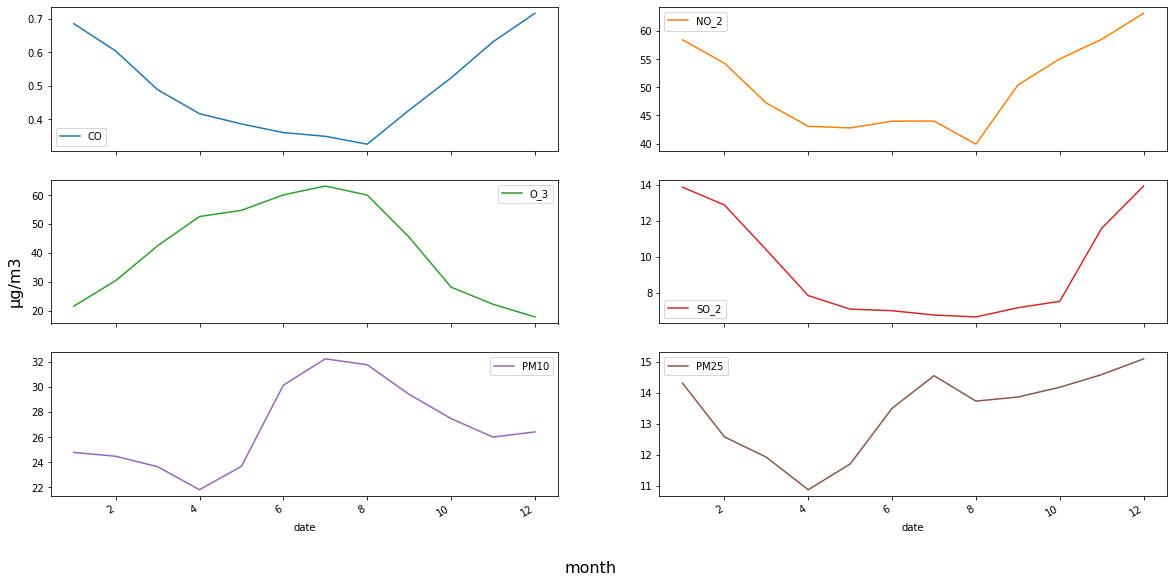

In [80]:
create_plots(df,'month')

PM10, PM2.5 and O2 increases in summer months while others increase during winter months when cold air gets thicker.

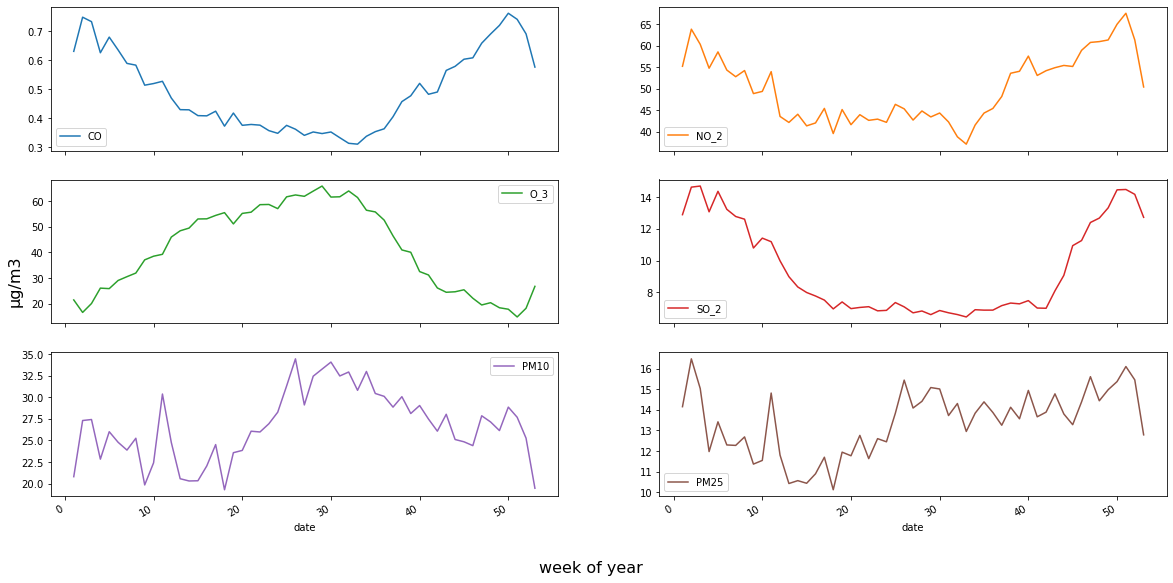

In [81]:
create_plots(df,'week of year')

Weeks follow a similiar trend to months but PM10 and Pm2.5 are not as smooth.

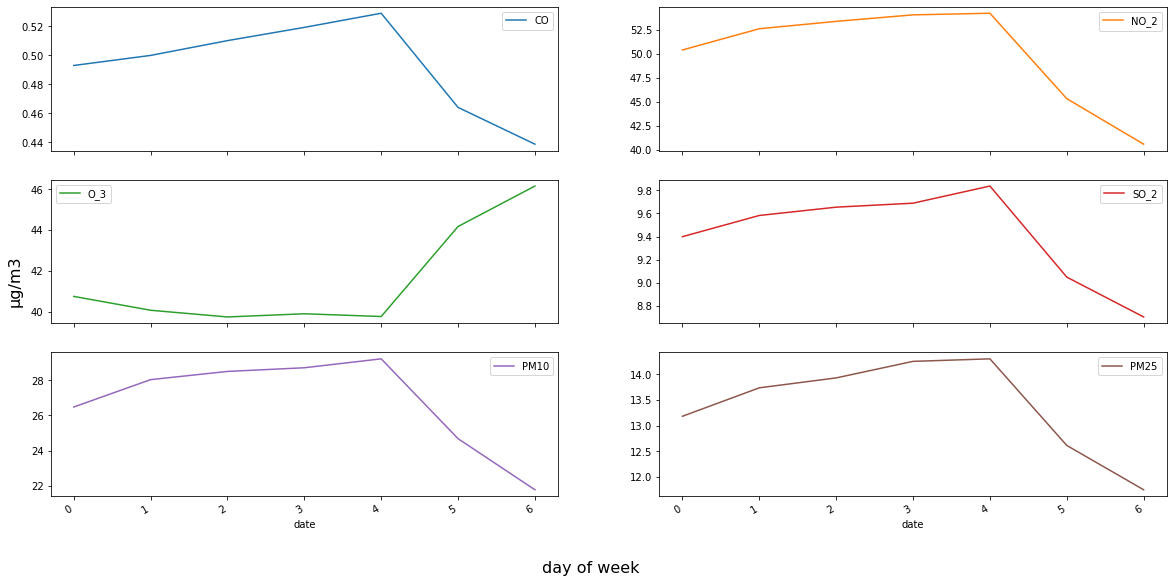

In [82]:
create_plots(df,'day of week')

O2 increases during the weekend but other decrease. Is it dependent on traffic?

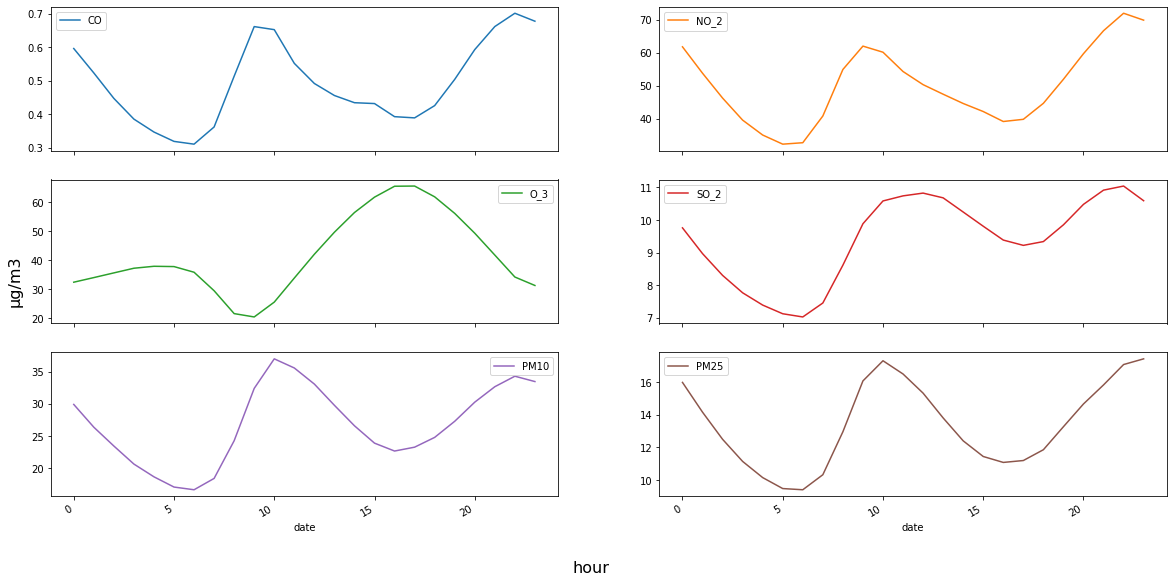

In [83]:
create_plots(df,'hour')

If seen during the day itself, Ozone rises towards late night and early mornin whereas others are at higher levels during the day. 

### Final Time Series for Prediction

To me it seems most sense to forecast the pollution at a weekly level. The reason being from a business point of view forecasting for day/hour seems to be too less of a time since no action can be taken in such a short time whereas a week ahead gives enough time for appropriate actions to counter higher pollution levels.
Another option is to forecast for next month but since month to month plot seems very smooth, plus could have a higher error due to granuality of grouping and forecasting, I choose to forecast for next week.

In [84]:
#grouping data weekly
df = df.groupby([pd.Grouper(key='date', freq='W-SUN')]).mean().reset_index().sort_values('date')

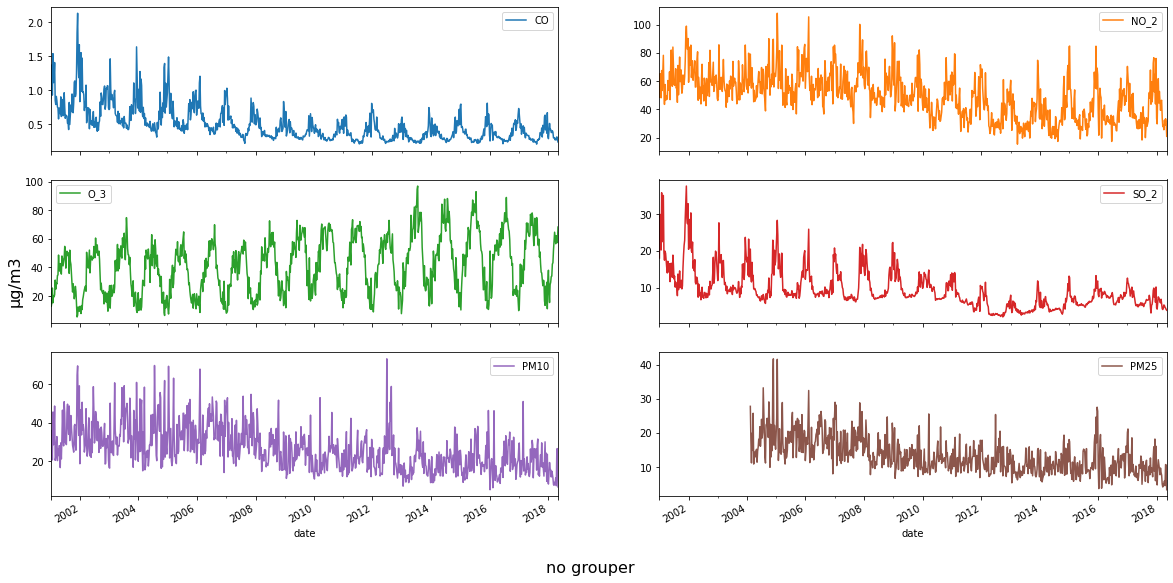

In [85]:
#visualising final time series for forecasting
create_plots(df,'no grouper')

Next I will look at trend, seasonality and stationarity for better feature engineering

In [86]:
df.head()

,date,CO,NO_2,O_3,SO_2,PM10,PM25
0,2001-01-07,0.880767,48.604425,24.924780,18.089203,19.640125,NaN
1,2001-01-14,1.371051,65.323102,12.734253,30.002406,36.037820,NaN
2,2001-01-21,1.281977,59.049192,15.372561,26.539007,33.718970,NaN
3,2001-01-28,0.926437,48.241708,25.615719,20.262450,20.759673,NaN
4,2001-02-04,1.537293,67.559055,15.276257,35.896125,45.634492,NaN


In [87]:
df.to_csv('air_pollution.csv',index=False)